In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('Dataset-1.csv')

# Ensure the dataset has at least 54 columns (52 features + 2 target features)
assert df.shape[1] >= 54, "The dataset must have at least 54 columns."

# Separate the features (first 52 columns) into X and the target (last 2 columns) into y
X = df.iloc[:, :52].values  # The first 52 columns
y = df.iloc[:, 52:54].values  # The last 2 columns

# Shuffle the dataset
np.random.seed(42)
shuffled_indices = np.random.permutation(len(X))

# Determine the split index (e.g., 80% training, 20% testing)
split_index = int(len(X) * 0.8)

# Split into training and testing sets
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Verify the shapes of the splits
print(f"X_train shape: {X_train.shape}")  # Should be (80% of samples, 52)
print(f"X_test shape: {X_test.shape}")    # Should be (20% of samples, 52)
print(f"y_train shape: {y_train.shape}")  # Should be (80% of samples, 2)
print(f"y_test shape: {y_test.shape}")    # Should be (20% of samples, 2)

X_train shape: (7999, 52)
X_test shape: (2000, 52)
y_train shape: (7999, 2)
y_test shape: (2000, 2)


In [3]:
# Check for NaNs or Infs in X and y
print("NaNs in X:", np.isnan(X).sum())
print("Infs in X:", np.isinf(X).sum())
print("NaNs in y:", np.isnan(y).sum())
print("Infs in y:", np.isinf(y).sum())

# Check the shape of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

# Check the data types of X and y
print("X dtype:", X.dtype)
print("y dtype:", y.dtype)

NaNs in X: 0
Infs in X: 0
NaNs in y: 0
Infs in y: 0
X shape: (9999, 52)
y shape: (9999, 2)
X dtype: float64
y dtype: float64


c:\Users\harsh\OneDrive\Desktop\UAV_Sworm_Synchronization\Models\ANN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0207
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0076
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.0022
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0284e-04
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 8.0077e-04
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3792e-04
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0761e-04
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0420e-04
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3230e-04
Epoch 14/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 6.1346e-04
Epoch 1

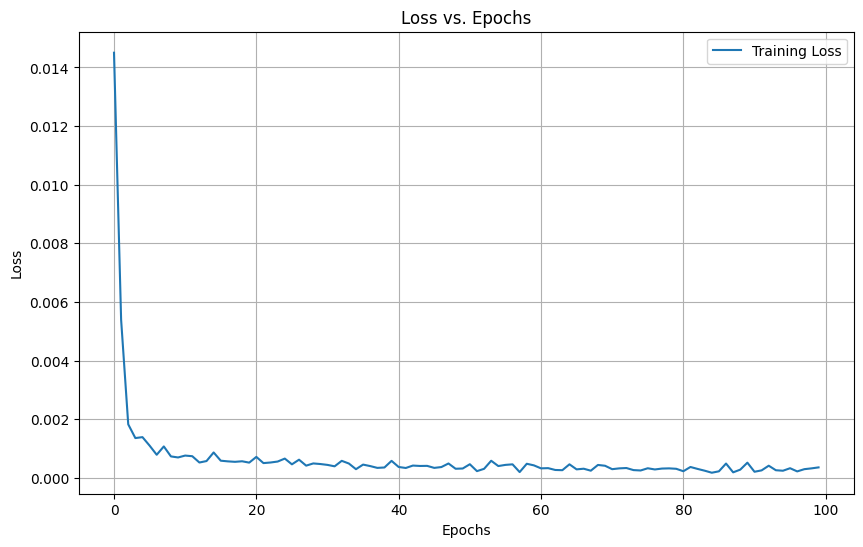

In [4]:
X=np.array(X_train)
y=np.array(y_train)

# Define the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(52,))) # Input layer
model.add(Dense(units=128, activation='relu')) # Hidden layer 1
model.add(Dense(units=64, activation='relu')) # Hidden layer 2
model.add(Dense(units=2, activation='linear')) # Output layer
model.compile(optimizer='adam', loss='mean_squared_error') # Compile the model

# Train the model and print the loss every 100th epoch
class PrintLossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}, Loss: {logs["loss"]:.4f}')

# Train the model
history=model.fit(X, y, epochs=100, batch_size=32, callbacks=[PrintLossCallback()])

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,296 (235.54 KB)

 Trainable params: 20,098 (78.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,198 (157.03 KB)

In [8]:
# Save the model architecture as an image file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [18]:
# Convert test data to numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) manually
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Compare a few predicted vs actual values
print("\nComparison of predicted and actual values (first 5 examples):")
for i in range(5):
    print(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 3.6588e-04
Test Loss: 0.0004
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
Mean Squared Error on Test Set: 0.0004

Comparison of predicted and actual values (first 5 examples):
Actual: [ 0.46202683 -0.37673469], Predicted: [ 0.4649753  -0.36859378]
Actual: [0. 0.], Predicted: [-0.00448086  0.00222367]
Actual: [0.38309275 0.27148782], Predicted: [0.35899314 0.29126525]
Actual: [0. 0.], Predicted: [-0.00448086  0.00222367]
Actual: [ 0.         -0.29662889], Predicted: [-0.01803099 -0.27471292]


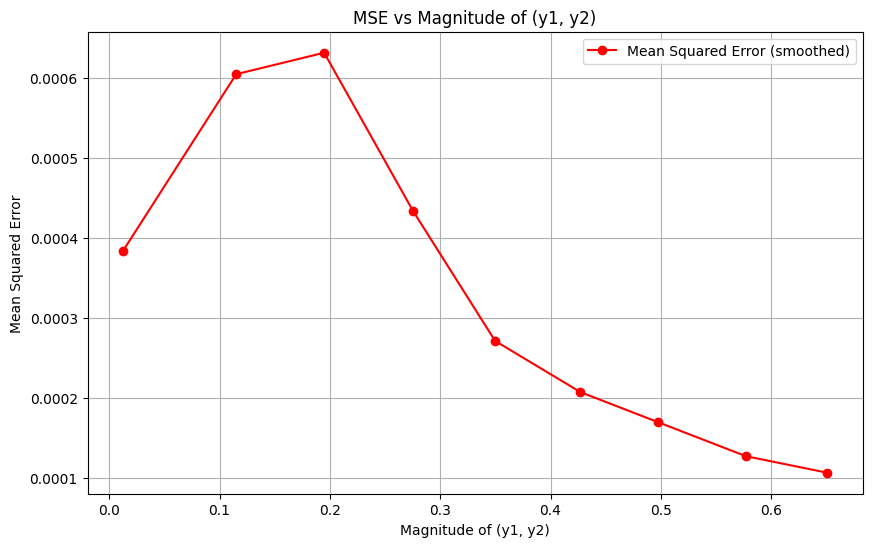

In [11]:
from scipy.ndimage import gaussian_filter1d

# Step 1: Calculate the magnitude for both actual and predicted values
def calculate_magnitude(y):
    return np.sqrt(y[:, 0]**2 + y[:, 1]**2)

y_test_magnitude = calculate_magnitude(y_test)
y_pred_magnitude = calculate_magnitude(y_pred)

# Step 2: Define accuracy as Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return (actual - predicted) ** 2

# Step 3: Create bins based on magnitude ranges
bins = np.linspace(min(y_test_magnitude), max(y_test_magnitude), 10)
bin_indices = np.digitize(y_test_magnitude, bins)

# Step 4: Calculate the MSE for each bin
mse_per_bin = []
magnitude_per_bin = []

for i in range(1, len(bins)):
    bin_mask = (bin_indices == i)
    
    # Get actual and predicted values in the current bin
    actual_bin = y_test_magnitude[bin_mask]
    predicted_bin = y_pred_magnitude[bin_mask]
    
    if len(actual_bin) > 0:
        mse = calculate_mse(actual_bin, predicted_bin).mean()
        mse_per_bin.append(mse)
        magnitude_per_bin.append(actual_bin.mean())

# Step 5: Smooth the MSE values using a Gaussian filter for smoothing
mse_per_bin_smooth = gaussian_filter1d(mse_per_bin, sigma=1)

# Step 6: Plot MSE vs Magnitude with smoothing
plt.figure(figsize=(10, 6))
plt.plot(magnitude_per_bin, mse_per_bin_smooth, marker='o', color='r', label='Mean Squared Error (smoothed)')
plt.xlabel('Magnitude of (y1, y2)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Magnitude of (y1, y2)')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
from keras.models import load_model

# Save the model
model.save('model.h5')
loaded_model = load_model("model.h5")

# Convert new test data to numpy arrays if not already
X_new_test = np.array([X_train[0]])

# Use the loaded model to predict
y_new_pred = loaded_model.predict(X_new_test)

# Print the predictions
print("Predictions for new test samples:")
for i, pred in enumerate(y_new_pred):
    print(f"{i+1}) {X_new_test[i]} -> {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predictions for new test samples:
1) [0.8432567  0.85931848 0.84928004 0.84928004 0.8513274  0.85291802
 0.84928004 0.84928004 0.87313855 0.16988146 0.84928004 0.16250232
 0.16746827 0.83491642 0.16250232 0.84928004 0.85550735 0.17354643
 0.84928004 0.16250232 0.88120022 0.19494918 0.84928004 0.16250232
 0.12679356 0.83820012 0.16250232 0.84928004 0.82775314 0.86324496
 0.84928004 0.84928004 0.79661055 0.8545045  0.84928004 0.84928004
 0.22713496 0.15055488 0.16250232 0.16250232 0.81774464 0.8526831
 0.84928004 0.84928004 0.12634247 0.80003388 0.16250232 0.84928004
 0.20213971 0.13943396 0.16250232 0.16250232] -> [ 0.3005963  -0.15682425]
